In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average

# v2: use climatological vol_transp*Tf instead of 1/5-daily vol transport
# v3: use monthly mean for mean advection
#    - it doesn't change the mean but makes difference for the eddy (calculate as instantaneous_HT - mean_HT)*dt
#

In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [ ]:
client = Client()
client

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [5]:
# load ice draft to create masks
expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
# Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
# overwrite Tf_heat_transport_10km using climatological volume transport*Tf
Tf_heat_transport_10km = vol_transp_clim_10km*Tf*Cp*rho0

In [7]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 29.7 ms, sys: 11.5 ms, total: 41.2 ms
Wall time: 49.4 ms


In [8]:
# define mean currents:
vol_transp_clim_4km = vol_transport_4km.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4km = vol_transp_clim_4km*Tf*Cp*rho0

In [9]:
%%time
expt = 'WAOM4_notides'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 13.5 ms, sys: 11.1 ms, total: 24.7 ms
Wall time: 27.1 ms


In [10]:
# define mean currents:
vol_transp_clim_4kmNT = vol_transport_4kmNT.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4kmNT = vol_transp_clim_4kmNT*Tf*Cp*rho0

In [11]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [12]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


NET_HT = (np.cumsum(np.sum(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0), axis=0),axis=0))
ABS_HT =  (np.cumsum(np.sum(np.nanmean((heat_transport_10km),  axis=0), axis=0),axis=0))
NET_HT_4km = (np.cumsum(np.sum(np.nanmean((heat_transport_4km-Tf_heat_transport_4km),  axis=0), axis=0),axis=0))
ABS_HT_4km =  (np.cumsum(np.sum(np.nanmean((heat_transport_4km),  axis=0), axis=0),axis=0))
NET_HT_4kmNT = (np.cumsum(np.sum(np.nanmean((heat_transport_4kmNT-Tf_heat_transport_4kmNT),  axis=0), axis=0),axis=0))
ABS_HT_4kmNT = (np.cumsum(np.sum(np.nanmean((heat_transport_4kmNT),  axis=0), axis=0),axis=0))

# uses climatological Tf_heat_transport instead:
TF_HT = np.cumsum(np.sum((Tf_heat_transport_10km), axis=0), axis=0)
TF_HT_4km = np.cumsum(np.sum((Tf_heat_transport_4km), axis=0), axis=0)
TF_HT_4kmNT = np.cumsum(np.sum((Tf_heat_transport_4kmNT), axis=0), axis=0)



In [13]:
print(np.nanmean(ABS_HT)*1e-12, (ABS_HT[-1])*1e-12)
print(np.nanmean(ABS_HT_4km)*1e-12, (ABS_HT_4km[-1])*1e-12)
print(np.nanmean(ABS_HT_4kmNT)*1e-12, (ABS_HT_4kmNT[-1])*1e-12)

-53.416138700796076 -43.88332702054987
-32.301445653601114 -73.86370088388136
-27.689964266741494 -84.77880054171331


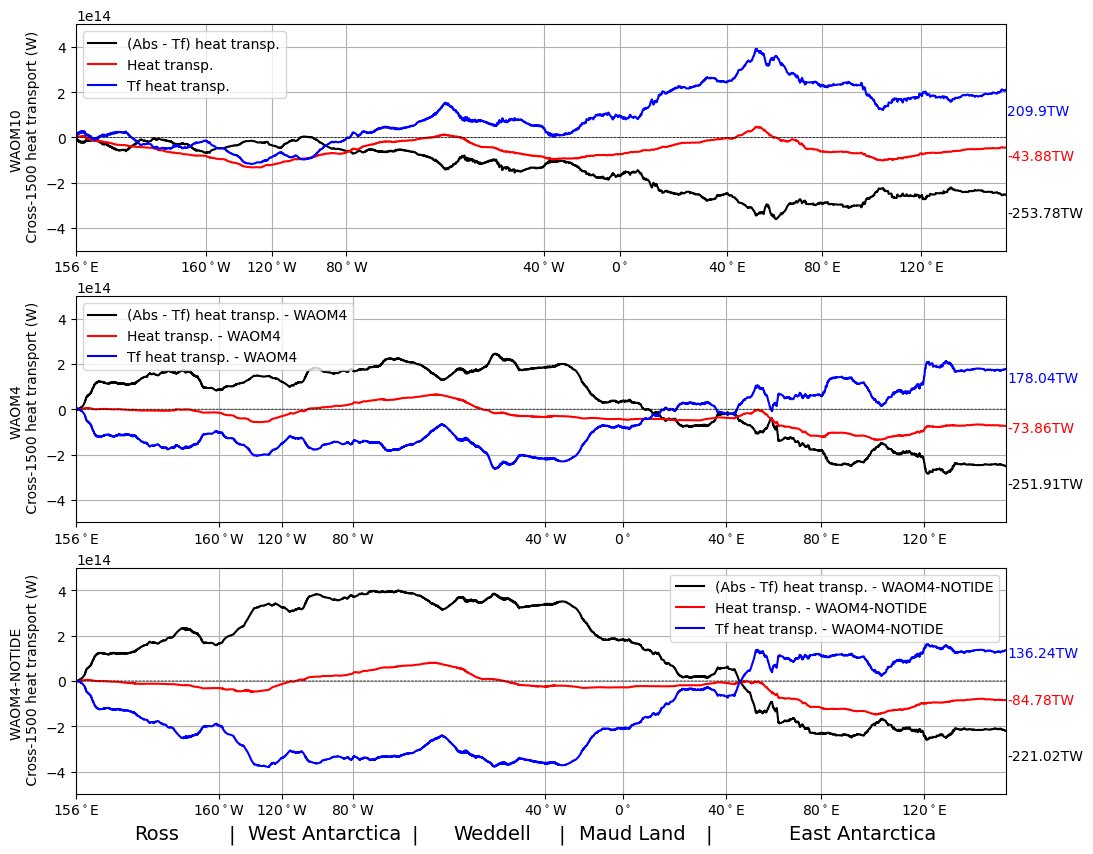

In [14]:
# plot with vertically integrated cross-1500m HT: WAOM10 vs WAOM4/4NT

fig, ax = plt.subplots(nrows=3, figsize = (12, 10))
ax[0].plot(dist_along_10km,NET_HT, '-k', label='(Abs - Tf) heat transp.') 
ax[0].plot(dist_along_10km,ABS_HT, '-r', label='Heat transp.') 
ax[0].plot(dist_along_10km,TF_HT, '-b', label='Tf heat transp.') 
ax[0].text(20.8,1e14,   str(np.round(TF_HT[-1].values*1e-12,decimals=2)) + 'TW', color='b')
ax[0].text(20.8,-1e14,  str(np.round(ABS_HT[-1]*1e-12,decimals=2)) + 'TW', color='r')
ax[0].text(20.8,-3.5e14,str(np.round(NET_HT[-1]*1e-12,decimals=2)) + 'TW', color='k')

ax[0].plot(dist_along_10km,dist_along_10km*0, '--k', linewidth=0.5) 
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].set_ylim(-5e14, 5e14)
ax[0].set_ylabel('WAOM10 \n Cross-1500 heat transport (W)')
ax[0].legend()
ax[0].grid()

ax[1].plot(dist_along_4km,NET_HT_4km, '-k', label='(Abs - Tf) heat transp. - WAOM4') 
ax[1].plot(dist_along_4km,ABS_HT_4km, '-r', label='Heat transp. - WAOM4') 
ax[1].plot(dist_along_4km,TF_HT_4km, '-b', label='Tf heat transp. - WAOM4') 
ax[1].text(22.2,1.2e14,str(np.round(TF_HT_4km[-1].values*1e-12,decimals=2)) + 'TW', color='b')
ax[1].text(22.2,-1e14, str(np.round(ABS_HT_4km[-1]*1e-12,decimals=2)) + 'TW', color='r')
ax[1].text(22.2,-3.5e14,str(np.round(NET_HT_4km[-1]*1e-12,decimals=2)) + 'TW', color='k')

ax[1].plot(dist_along_4km,dist_along_4km*0, '--k', linewidth=0.5) 
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].set_ylim(-5e14, 5e14)
ax[1].set_ylabel('WAOM4 \n Cross-1500 heat transport (W)')
ax[1].legend()
ax[1].grid()

ax[2].plot(dist_along_4km,NET_HT_4kmNT, '-k', label='(Abs - Tf) heat transp. - WAOM4-NOTIDE') 
ax[2].plot(dist_along_4km,ABS_HT_4kmNT, '-r', label='Heat transp. - WAOM4-NOTIDE') 
ax[2].plot(dist_along_4km,TF_HT_4kmNT, '-b', label='Tf heat transp. - WAOM4-NOTIDE') 

ax[2].text(22.2,1.05e14,str(np.round(TF_HT_4kmNT[-1].values*1e-12,decimals=2)) + 'TW', color='b')
ax[2].text(22.2,-1e14,str(np.round(ABS_HT_4kmNT[-1]*1e-12,decimals=2)) + 'TW', color='r')
ax[2].text(22.2,-3.5e14,str(np.round(NET_HT_4kmNT[-1]*1e-12,decimals=2)) + 'TW', color='k')

ax[2].plot(dist_along_4km,dist_along_4km*0, '--k', linewidth=0.5) 

ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].set_ylim(-5e14, 5e14)
ax[2].set_ylabel('WAOM4-NOTIDE \n Cross-1500 heat transport (W)')
# ax[2].set_xlabel('Longitude along 1500m isobath contour')
ax[2].legend()
ax[2].grid()

# 4) Mask Ross (140W : 160E, lat < -60)
ax[2].text(2.895576e+00-1.5,-7e14,'Ross',fontsize=14, color='k')
ax[2].text(3.634185,-7e14,'|',fontsize=14, color='k')
# 5) Mask West Antarctica (150W : 90W, lat < -65)
ax[2].text(4.1,-7e14,'West Antarctica',fontsize=14, color='k')
ax[2].text(8,-7e14,'|',fontsize=14, color='k')
# 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
ax[2].text(9,-7e14,'Weddell',fontsize=14, color='k')
ax[2].text(11.5,-7e14,'|',fontsize=14, color='k')
# 2) Mask Maud Land (25W : 60E, lat < -60)
ax[2].text(12,-7e14,'Maud Land',fontsize=14, color='k')
ax[2].text(15,-7e14,'|',fontsize=14, color='k')
# 3) Mask East Antarctica (60E : 160E, lat < -60)
ax[2].text(17,-7e14,'East Antarctica',fontsize=14, color='k')

# 9.835477e-03 = 156 E
# 2.895576e+00 = 160 W
# 4.372794e+00 = 120 W
# 6.040599e+00 = 80 W
# 1.045151e+01 = 40 W
# 1.213875e+01 = 0
# 1.454005e+01 = 40 E
# 1.665391e+01 = 80 E
# 1.887308e+01 = 120 E

name_fig='WAOM10x4x4NT_Cross-1500m_CumTransport_vint2_v3.png'
plt.savefig(fig_path + name_fig, dpi=300)

In [15]:
print((2.895576e+00+4.372794e+00)/2)

3.634185


In [1]:
# plot with vertically integrated cross-1500m HT: WAOM10 vs WAOM4/4NT

# HOW TO PUT BOTH 10 AND 4KM IN THE SAME X-AXIS????
# R: interpolating dist_along_10km to 4km limits:
dist_along_10km_interp = np.linspace(dist_along_4km[0], dist_along_4km[-1], num=len(dist_along_10km))


fig, ax = plt.subplots(nrows=3, figsize = (12, 14))

ax.plot(dist_along_10km_interp,NET_HT, '-r', label='(Abs - Tf) heat transp. - WAOM10') 
ax.plot(dist_along_4km,NET_HT_4km, '-b', label='(Abs - Tf) heat transp. - WAOM4') 
ax.plot(dist_along_4km,NET_HT_4kmNT, '-c', label='(Abs - Tf) heat transp. - WAOM4-NOTIDE') 
ax.plot(dist_along_10km_interp,dist_along_10km*0, '--k', linewidth=0.5) 

ax.set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax.set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax.set_xlim(0, dist_along_4km[-1])

ax.set_ylim(-5e14, 5e14)
ax.set_ylabel('Cross-1500 heat transport (W)')
ax.legend()
ax.grid()

# # 4) Mask Ross (140W : 160E, lat < -60)
# ax[2].text(2.895576e+00-1.5,-7e14,'Ross',fontsize=14, color='k')
# ax[2].text(3.634185,-7e14,'|',fontsize=14, color='k')
# # 5) Mask West Antarctica (150W : 90W, lat < -65)
# ax[2].text(4.1,-7e14,'West Antarctica',fontsize=14, color='k')
# ax[2].text(8,-7e14,'|',fontsize=14, color='k')
# # 1) Mask Weddell (90W : 25W, lat < -75, 65W : 25W, lat <= -75)
# ax[2].text(9,-7e14,'Weddell',fontsize=14, color='k')
# ax[2].text(11.5,-7e14,'|',fontsize=14, color='k')
# # 2) Mask Maud Land (25W : 60E, lat < -60)
# ax[2].text(12,-7e14,'Maud Land',fontsize=14, color='k')
# ax[2].text(15,-7e14,'|',fontsize=14, color='k')
# # 3) Mask East Antarctica (60E : 160E, lat < -60)
# ax[2].text(17,-7e14,'East Antarctica',fontsize=14, color='k')


name_fig='WAOM10x4x4NT_Cross-1500m_CumTransport_vint_v3.png'
plt.savefig(fig_path + name_fig, dpi=300)

NameError: name 'np' is not defined

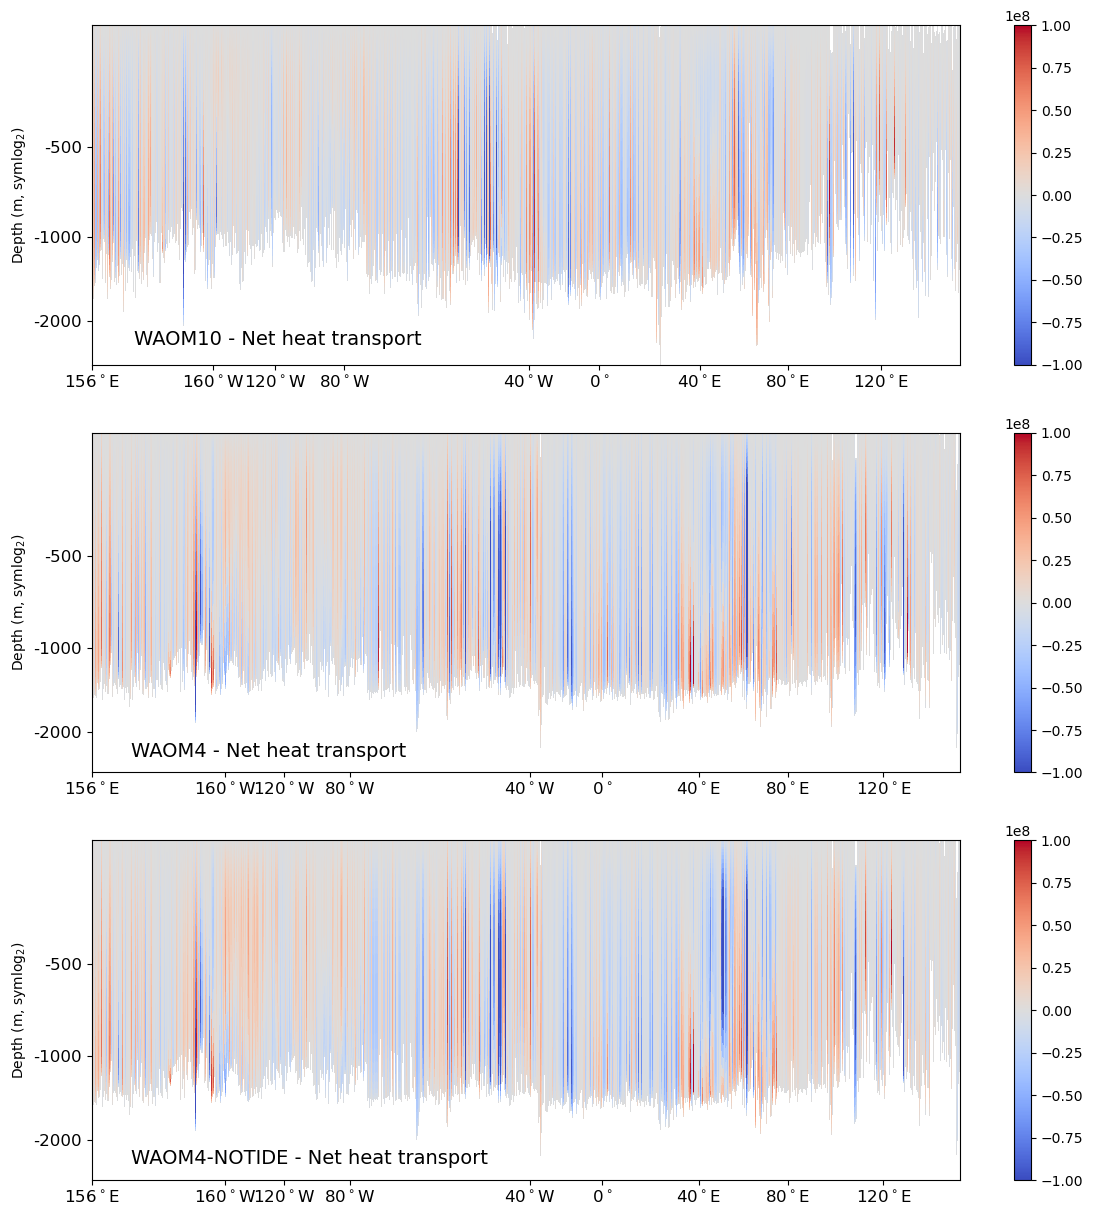

In [18]:
# plot section with discretised depths:

# THESE NEED TO BE WEIGHTED BY SPECIFIC MODEL AREA - OTHERWISE MAGNITUDES ARE NOT COMPARABLE ACROSS RESOLUTIONS!
# NB: CURRENTLY DIVIDING 10KM BY 2.5 FACTOR, see below:


fig, ax = plt.subplots(nrows=3, figsize = (14, 15))

cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.divide(np.nanmean((heat_transport_10km-Tf_heat_transport_10km), axis=0),area_10km), cmap='coolwarm', vmin=-1e8 , vmax=1e8)
fig.colorbar(cht, ax=ax[0])
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'WAOM10 - Net heat transport',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.divide(np.nanmean((heat_transport_4km-Tf_heat_transport_4km), axis=0),area_4km), cmap='coolwarm', vmin=-1e8 , vmax=1e8)
fig.colorbar(cht, ax=ax[1])
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'WAOM4 - Net heat transport',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.divide(np.nanmean((heat_transport_4kmNT-Tf_heat_transport_4kmNT), axis=0),area_4km), cmap='coolwarm', vmin=-1e8 , vmax=1e8)
fig.colorbar(cht, ax=ax[2])
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'WAOM4-NOTIDE - Net heat transport',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

name_fig='WAOM10x4x4NT_Cross-1500m_NetHeatTransport_V3.png'
plt.savefig(fig_path + name_fig, dpi=300)